In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta
from itertools import compress


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
d = datetime(4,12,26);
print d.date

ms = gps_particle_data.meta_search();

e = gps_particle_data.event("Aleutian earthquake");
e.add_date(mins=53,hh=20,dd=23,mm=6,yy=14);
e.add_data("Geographic_Latitude", 51.80);
e.add_data("Geographic_Longitude",178.76);

start_date = datetime(14,06,15);
end_date = datetime(14,07,06);

ms.load_data(start_date,end_date);
ms.apply_search(e, 50);
# ms.extend_time_window(0.25);

output_data = ms.get_selected_data("decimal_day");
#print ('=====================')
#print output_data

<built-in method date of datetime.datetime object at 0x7f0f35aae490>
File ns41_140615_v1.03.ascii already exists 

Reading file ns41_140615_v1.03.ascii

Min Latitude         :  -55.5968
Max Latitude         :  55.5972
Min Longitude         :  1.1856
Max Longitude         :  359.1538
Min Radius         :  4.13678
Max Radius         :  4.201088
Min L Shell         :  4.093192
Max L Shell        :  25.0
Min Day            :  166.000139
Max Day            :  172.997361
Year             :  2014.0

File ns41_140622_v1.03.ascii already exists 

Reading file ns41_140622_v1.03.ascii

Min Latitude         :  -55.5906
Max Latitude         :  55.5886
Min Longitude         :  1.6074
Max Longitude         :  359.4726
Min Radius         :  4.136678
Max Radius         :  4.201202
Min L Shell         :  4.093231
Max L Shell        :  25.0
Min Day            :  173.000139
Max Day            :  179.997361
Year             :  2014.0

File ns41_140629_v1.03.ascii already exists 

Reading file ns41_140629_v


Reading file ns55_140706_v1.03.ascii

Min Latitude         :  -53.6556
Max Latitude         :  53.6561
Min Longitude         :  0.6114
Max Longitude         :  359.8875
Min Radius         :  4.142553
Max Radius         :  4.195598
Min L Shell         :  4.160124
Max L Shell        :  999.0
Min Day            :  187.002639
Max Day            :  193.997083
Year             :  2014.0

File ns55_140713_v1.03.ascii already exists 

Reading file ns55_140713_v1.03.ascii
File ns56_140615_v1.03.ascii already exists 

Reading file ns56_140615_v1.03.ascii

Min Latitude         :  -56.6248
Max Latitude         :  56.625
Min Longitude         :  0.0075
Max Longitude         :  359.9864
Min Radius         :  4.136737
Max Radius         :  4.201039
Min L Shell         :  4.099891
Max L Shell        :  999.0
Min Day            :  166.000972
Max Day            :  172.998194
Year             :  2014.0

File ns56_140622_v1.03.ascii already exists 

Reading file ns56_140622_v1.03.ascii

Min Latitude     


Reading file ns60_140629_v1.03.ascii

Min Latitude         :  -54.5322
Max Latitude         :  54.5294
Min Longitude         :  0.0001
Max Longitude         :  359.9771
Min Radius         :  4.12901
Max Radius         :  4.209217
Min L Shell         :  4.086487
Max L Shell        :  999.0
Min Day            :  180.000278
Max Day            :  186.9975
Year             :  2014.0

File ns60_140706_v1.03.ascii already exists 

Reading file ns60_140706_v1.03.ascii

Min Latitude         :  -54.5241
Max Latitude         :  54.5214
Min Longitude         :  0.0086
Max Longitude         :  359.9938
Min Radius         :  4.12892
Max Radius         :  4.209297
Min L Shell         :  4.088985
Max L Shell        :  999.0
Min Day            :  187.000278
Max Day            :  193.9975
Year             :  2014.0

File ns60_140713_v1.03.ascii already exists 

Reading file ns60_140713_v1.03.ascii
File ns61_140615_v1.03.ascii already exists 

Reading file ns61_140615_v1.03.ascii

Min Latitude         :


Reading file ns65_140622_v1.03.ascii

Min Latitude         :  -54.8118
Max Latitude         :  54.8128
Min Longitude         :  1.3545
Max Longitude         :  359.11
Min Radius         :  4.160362
Max Radius         :  4.17776
Min L Shell         :  4.136926
Max L Shell        :  999.0
Min Day            :  173.002407
Max Day            :  179.99963
Year             :  2014.0

File ns65_140629_v1.03.ascii already exists 

Reading file ns65_140629_v1.03.ascii

Min Latitude         :  -54.8134
Max Latitude         :  54.8137
Min Longitude         :  1.4659
Max Longitude         :  359.1695
Min Radius         :  4.160339
Max Radius         :  4.177769
Min L Shell         :  4.141529
Max L Shell        :  999.0
Min Day            :  180.002407
Max Day            :  186.99963
Year             :  2014.0

File ns65_140706_v1.03.ascii already exists 

Reading file ns65_140706_v1.03.ascii

Min Latitude         :  -54.8104
Max Latitude         :  54.8111
Min Longitude         :  1.521
Max Long

In [3]:
print e.data

{'Geographic_Latitude': 51.8, 'decimal_day': 174.8701388888889, 'Geographic_Longitude': 178.76, 'year': 2014}


In [4]:
file_list = []
for filename in output_data.keys():
    latitude = output_data[filename]['Geographic_Latitude']
    longitude = output_data[filename]['Geographic_Longitude']
    day = output_data[filename]['decimal_day']
    for i in range(len(day)):
        del_day = day[i] - e.data['decimal_day']
        del_lat = abs(latitude[i] - e.data['Geographic_Latitude'])
        del_lon = abs(longitude[i]- e.data['Geographic_Longitude'])
        if del_day >= 0 and del_lat < 1 and del_lon < 1:
            if filename not in file_list:
                file_list.append(filename)
            print('======>')
            print filename, day[i], latitude[i], longitude[i], '===>', del_lat, del_lon

======>
ns58_140622 [ 174.984583] [ 52.5108] [ 179.0407] ===> [ 0.7108] [ 0.2807]
======>
ns58_140622 [ 175.981806] [ 52.5408] [ 179.1283] ===> [ 0.7408] [ 0.3683]
======>
ns58_140622 [ 176.979028] [ 52.5702] [ 179.2139] ===> [ 0.7702] [ 0.4539]
======>
ns58_140622 [ 177.97625] [ 52.6017] [ 179.3067] ===> [ 0.8017] [ 0.5467]
======>
ns58_140622 [ 178.973472] [ 52.6313] [ 179.3914] ===> [ 0.8313] [ 0.6314]
======>
ns58_140622 [ 179.970694] [ 52.6622] [ 179.4795] ===> [ 0.8622] [ 0.7195]
======>
ns58_140706 [ 187.945694] [ 52.0446] [ 178.1717] ===> [ 0.2446] [ 0.5883]
======>
ns58_140706 [ 188.942917] [ 52.0759] [ 178.2539] ===> [ 0.2759] [ 0.5061]
======>
ns58_140706 [ 189.940139] [ 52.107] [ 178.3385] ===> [ 0.307] [ 0.4215]
======>
ns58_140706 [ 190.937361] [ 52.142] [ 178.4365] ===> [ 0.342] [ 0.3235]
======>
ns58_140706 [ 191.934583] [ 52.174] [ 178.5247] ===> [ 0.374] [ 0.2353]
======>
ns58_140706 [ 192.931806] [ 52.2093] [ 178.6226] ===> [ 0.4093] [ 0.1374]
======>
ns58_140706 [ 1

In [6]:
print file_list

['ns58_140622', 'ns58_140706', 'ns58_140629', 'ns58_140713']


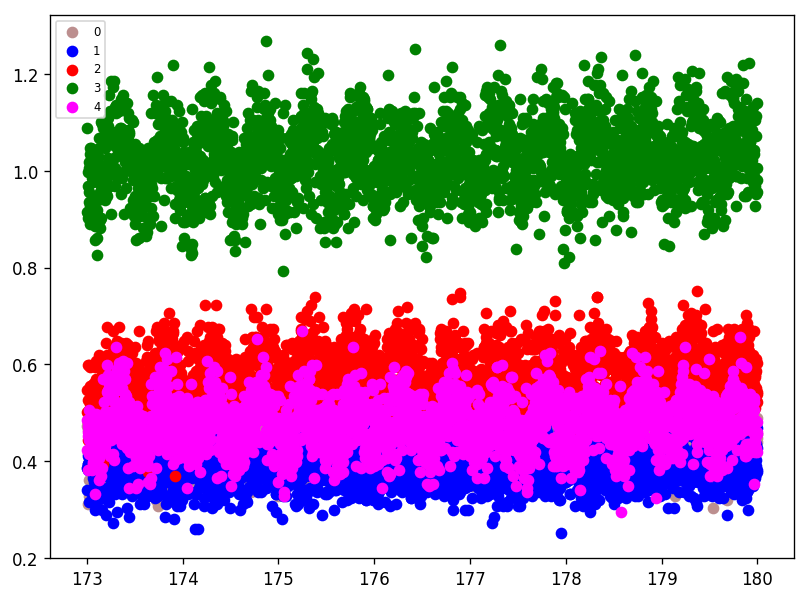

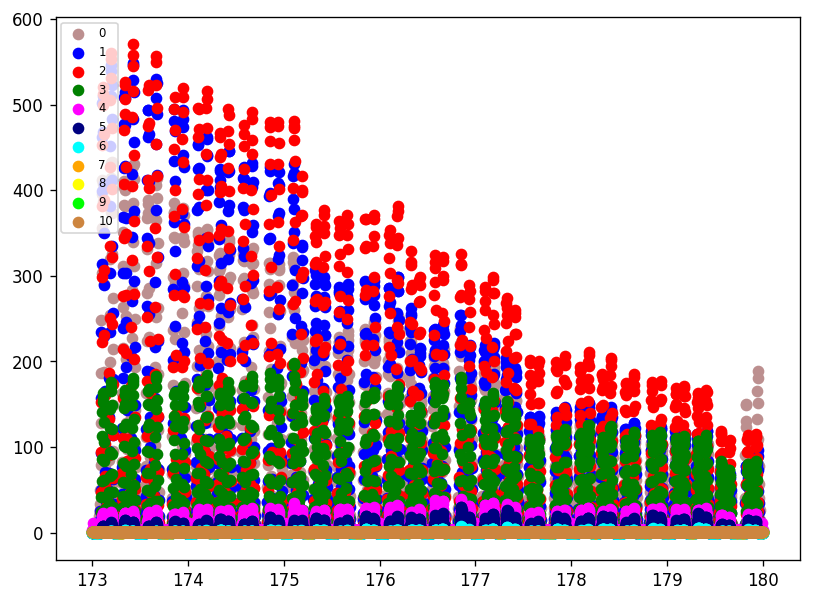

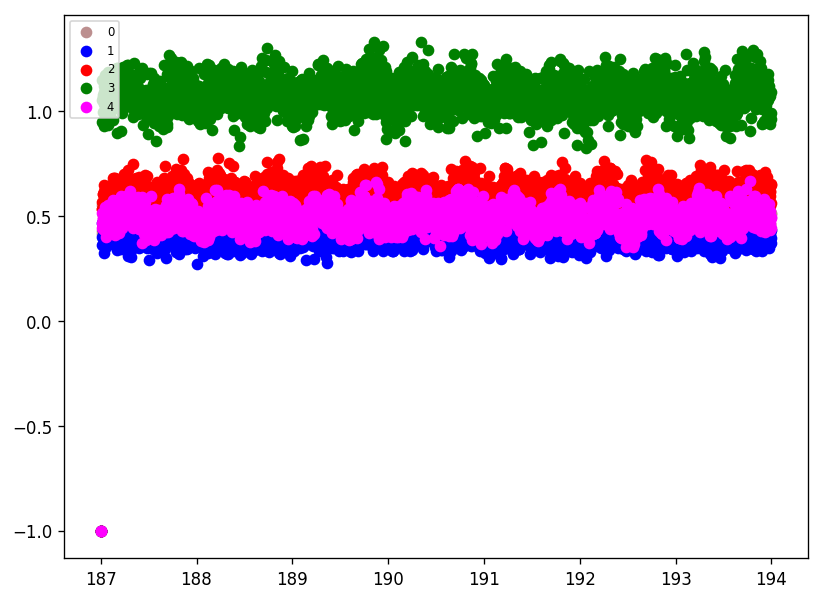

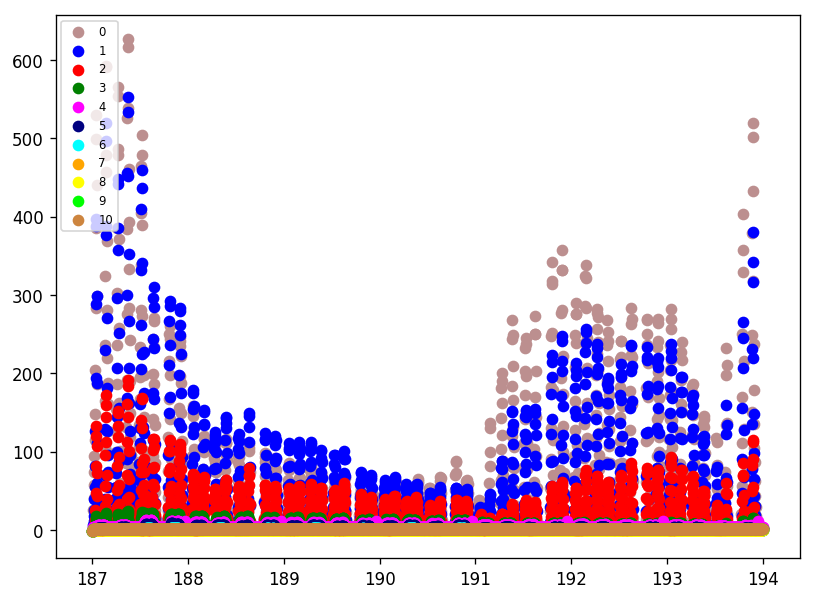

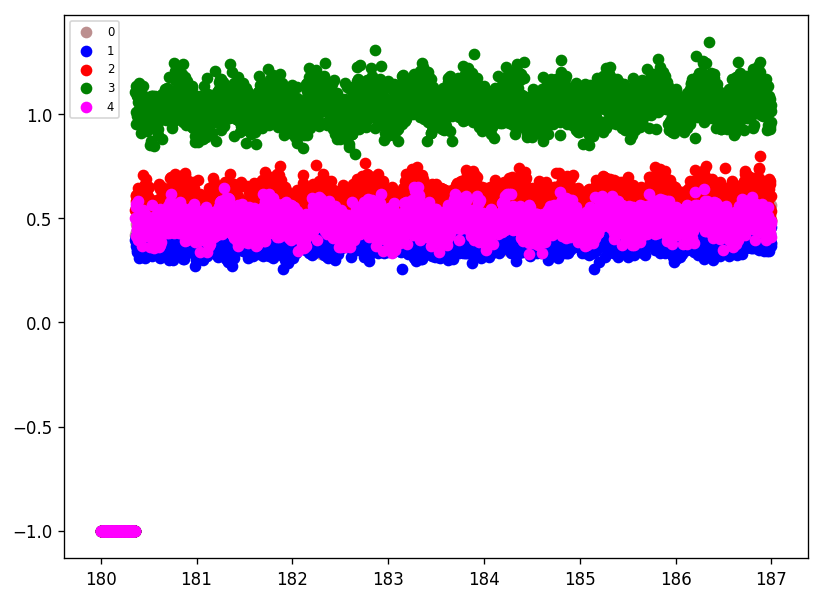

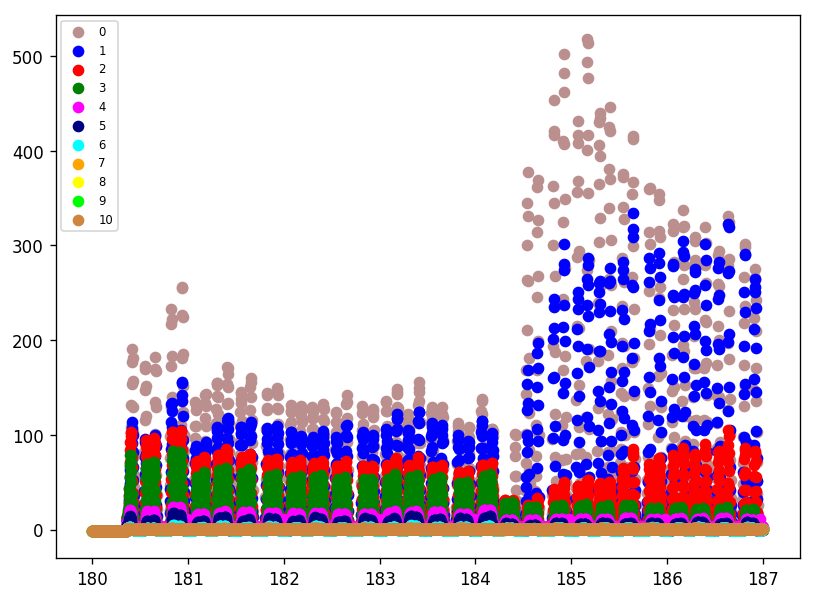

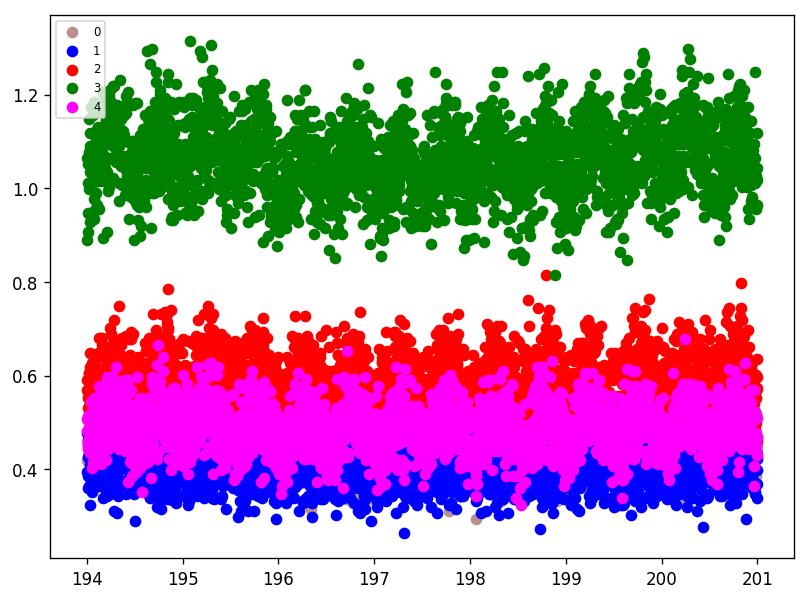

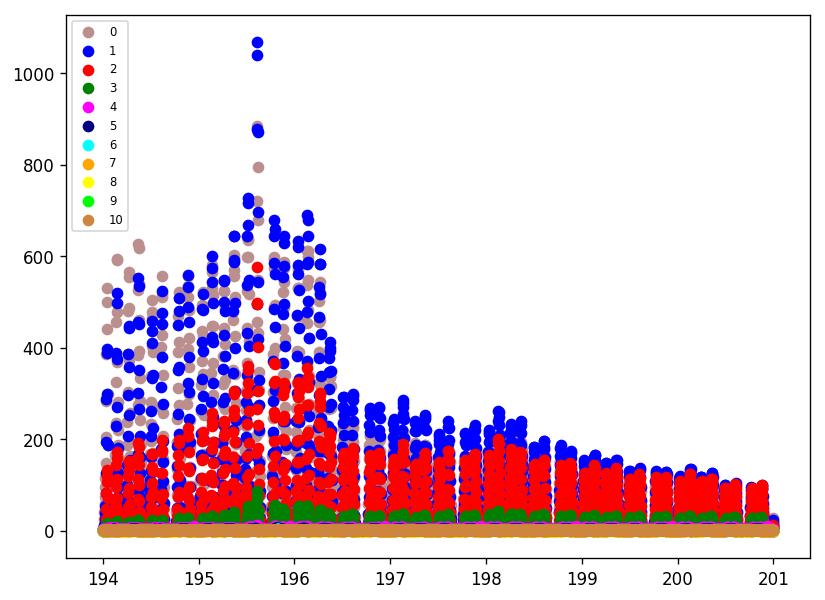

In [26]:
e_signal = 'rate_electron_measured'
p_signal = 'rate_proton_measured'

for fn in file_list:
    #print fn
    x =  np.array(output_data[fn]["decimal_day"][:])
    tmp = output_data[fn][p_signal]
    tme = output_data[fn][e_signal]
    #print tmp[0]
    p_eng = np.array_split(tmp, range(len(tmp[0])), axis = 1)
    e_eng = np.array_split(tme, range(len(tme[0])), axis = 1)
    #print x[0]
#print len(x), len(p_eng[1])
    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']
    fig = plt.figure(figsize=(8, 6), dpi=120)
    ax = fig.add_subplot(111)    
    for i in range(len(tmp[0])):
        ax.scatter(x, p_eng[i+1][:len(x)], color = colour[i] ,label = i)
    ax.legend(loc = 'upper left', fontsize = 'x-small')
    plt.show()
    
    fig = plt.figure(figsize=(8, 6), dpi=120)  
    ax = fig.add_subplot(111) 
    for j in range(len(tme[0])):
        ax.scatter(x, e_eng[j+1][:len(x)], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left', fontsize = 'x-small')
    plt.show()
    print('===============================================')
